In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import statistics
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


## DCM Float

/tmp/ipykernel_475547/3288003361.py:75: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  bar.set_hatch(patterns['llama'])


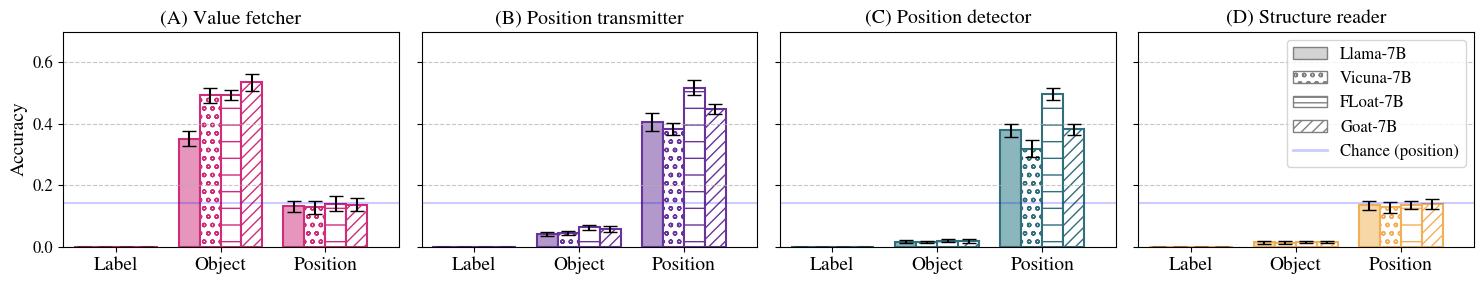

In [38]:
source = '../finetuning/experiment_2/results/activation_patching/float_circuit/'
models = ['llama','vicuna','float','goat']
groups = ['value_fetcher','pos_transmitter','pos_detector','struct_reader']
tests = ['box_label_value','object_value','positional']
data = {}

for model in models:
    with open(os.path.join(source,f"{model}_semantic_results.json"), 'r') as file:
        cur_data = json.load(file)
        data_means = {}
        data_stds = {}
        for group in groups:
            means = []
            stds = []
            for test in tests:
                values = cur_data[model][group][test]
                means.append(sum(values)/len(values)/100)
                stds.append(statistics.stdev([x / 100 for x in values]))
            data_means[group] = means
            data_stds[group] = stds
    data[f"{model}_mean"] = data_means    
    data[f"{model}_std"] = data_stds

# set width ofbar
barWidth = 0.2
num_figs = 4

desiderata = ['Label', 'Object', 'Position']
group_names = ['(A) Value fetcher', '(B) Position transmitter', '(C) Position detector', '(D) Structure reader']
fig, axs = plt.subplots(1,num_figs,figsize=(15, 3),)
plt.subplots_adjust(hspace=0.05,wspace=0.05)

matplotlib.rcParams['font.size'] = 12  # Increase the base font size
matplotlib.rcParams['font.family'] = 'Nimbus Roman'

patterns = {'llama':   ' ', 
            'vicuna':  'oo', 
            'float':   '-',
            'goat':    '///'}



in_colors = ['#E695BD', 
          '#B298CB', 
          '#8BB6BD',
          '#F8D7A6']


edge_colors = ['#CF2C7A', 
          '#68349A', 
          '#306F7B',
          '#F3AF56']


for i,group in enumerate(groups):
    llama_val = data['llama_mean'][group]
    vicuna_val = data['vicuna_mean'][group]
    float_val = data['float_mean'][group]
    goat_val = data['goat_mean'][group]
    
    llama_err = data['llama_std'][group]
    vicuna_err = data['vicuna_std'][group]
    float_err = data['float_std'][group]
    goat_err = data['goat_std'][group]
        
    # Set position of bar on X axis
    br1 = np.arange(len(llama_val))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    # Make the plot
    bars = axs[i].bar(br1, llama_val, color =in_colors[i], edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Llama-7b')
    for bar in bars:
        bar.set_hatch(patterns['llama']) 
    axs[i].errorbar(br1, llama_val, yerr=llama_err, fmt=' ', color='black', capsize=5)
    bars = axs[i].bar(br2, vicuna_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Vicuna-7b')
    for bar in bars:
        bar.set_hatch(patterns['vicuna']) 
    axs[i].errorbar(br2, vicuna_val, yerr=vicuna_err, fmt=' ', color='black', capsize=5)
    bars = axs[i].bar(br3, float_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Float-7b')
    for bar in bars:
        bar.set_hatch(patterns['float']) 
    axs[i].errorbar(br3, float_val, yerr=float_err, fmt=' ', color='black', capsize=5)
    bars = axs[i].bar(br4, goat_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Goat-7b')
    for bar in bars:
        bar.set_hatch(patterns['goat']) 
    axs[i].errorbar(br4, goat_val, yerr=goat_err, fmt=' ', color='black', capsize=5)
    axs[i].plot([br1[0]-1,br4[-1]+1],[0.1428,0.1428], color ='blue', alpha = 0.2, label='Chance (position)')

    # Adding Xticks
    axs[i].set_xticks([r + 2*barWidth-barWidth/2 for r in br1])  # Set the tick positions
    axs[i].set_xticklabels(desiderata, fontsize=14)  # Set the tick labels
    axs[i].tick_params(axis="x", labelrotation=0) 
#     axs[i].grid(axis='y')
    axs[i].set_ylim(0,0.7)
    axs[i].set_xlim(-.2,3)
    axs[i].set_title(group_names[i])


    if i==0:
        axs[i].set_ylabel('Accuracy', fontsize=14)
        axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)  
    else:
        axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    #         axs[i].set_yticks([    ])
        tick_positions = axs[i].get_yticks()
        tick_labels = axs[i].get_yticklabels()

        # Set the tick positions and empty labels
        axs[i].set_yticks(tick_positions)
        axs[i].set_yticklabels([''] * len(tick_labels))  # Set empty labels
        axs[i].set_ylim(0,0.7)
    if i==3:
        custom_handles = [
        mpatches.Patch(facecolor='lightgrey', edgecolor='grey', label='Llama-7B'),
        mpatches.Patch(facecolor='w', hatch=patterns['vicuna'], edgecolor='grey', label='Vicuna-7B'),
        mpatches.Patch(facecolor='w', hatch='---', edgecolor='grey', label='FLoat-7B'),
        mpatches.Patch(facecolor='w', hatch=patterns['goat'], edgecolor='grey', label='Goat-7B'),
        Line2D([0], [0], color ='blue', alpha = 0.2, lw=2, label='Chance (position)')
        ]

    # Create the legend with custom handles
        axs[i].legend(handles=custom_handles)
        
plt.tight_layout()
plt.savefig('dcm_float_circuit.pdf')



## DCM goat

/tmp/ipykernel_475547/1058683597.py:75: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  bar.set_hatch(patterns['llama'])


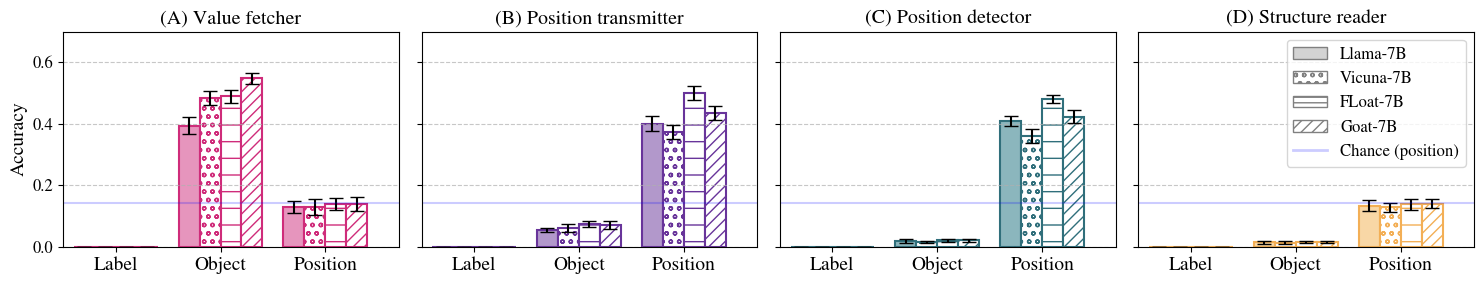

In [39]:
source = '../finetuning/experiment_2/results/activation_patching/goat_circuit/'
models = ['llama','vicuna','float','goat']
groups = ['value_fetcher','pos_transmitter','pos_detector','struct_reader']
tests = ['box_label_value','object_value','positional']
data = {}

for model in models:
    with open(os.path.join(source,f"{model}_semantic_results.json"), 'r') as file:
        cur_data = json.load(file)
        data_means = {}
        data_stds = {}
        for group in groups:
            means = []
            stds = []
            for test in tests:
                values = cur_data[model][group][test]
                means.append(sum(values)/len(values)/100)
                stds.append(statistics.stdev([x / 100 for x in values]))
            data_means[group] = means
            data_stds[group] = stds
    data[f"{model}_mean"] = data_means    
    data[f"{model}_std"] = data_stds

# set width ofbar
barWidth = 0.2
num_figs = 4

desiderata = ['Label', 'Object', 'Position']
group_names = ['(A) Value fetcher', '(B) Position transmitter', '(C) Position detector', '(D) Structure reader']
fig, axs = plt.subplots(1,num_figs,figsize=(15, 3),)
plt.subplots_adjust(hspace=0.05,wspace=0.05)

matplotlib.rcParams['font.size'] = 12  # Increase the base font size
matplotlib.rcParams['font.family'] = 'Nimbus Roman'

patterns = {'llama':   ' ', 
            'vicuna':  'oo', 
            'float':   '-',
            'goat':    '///'}



in_colors = ['#E695BD', 
          '#B298CB', 
          '#8BB6BD',
          '#F8D7A6']


edge_colors = ['#CF2C7A', 
          '#68349A', 
          '#306F7B',
          '#F3AF56']


for i,group in enumerate(groups):
    llama_val = data['llama_mean'][group]
    vicuna_val = data['vicuna_mean'][group]
    float_val = data['float_mean'][group]
    goat_val = data['goat_mean'][group]
    
    llama_err = data['llama_std'][group]
    vicuna_err = data['vicuna_std'][group]
    float_err = data['float_std'][group]
    goat_err = data['goat_std'][group]
        
    # Set position of bar on X axis
    br1 = np.arange(len(llama_val))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    # Make the plot
    bars = axs[i].bar(br1, llama_val, color =in_colors[i], edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Llama-7b')
    for bar in bars:
        bar.set_hatch(patterns['llama']) 
    axs[i].errorbar(br1, llama_val, yerr=llama_err, fmt=' ', color='black', capsize=5)
    bars = axs[i].bar(br2, vicuna_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Vicuna-7b')
    for bar in bars:
        bar.set_hatch(patterns['vicuna']) 
    axs[i].errorbar(br2, vicuna_val, yerr=vicuna_err, fmt=' ', color='black', capsize=5)
    bars = axs[i].bar(br3, float_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Float-7b')
    for bar in bars:
        bar.set_hatch(patterns['float']) 
    axs[i].errorbar(br3, float_val, yerr=float_err, fmt=' ', color='black', capsize=5)
    bars = axs[i].bar(br4, goat_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Goat-7b')
    for bar in bars:
        bar.set_hatch(patterns['goat']) 
    axs[i].errorbar(br4, goat_val, yerr=goat_err, fmt=' ', color='black', capsize=5)
    axs[i].plot([br1[0]-1,br4[-1]+1],[0.1428,0.1428], color ='blue', alpha = 0.2, label='Chance (position)')

    # Adding Xticks
    axs[i].set_xticks([r + 2*barWidth-barWidth/2 for r in br1])  # Set the tick positions
    axs[i].set_xticklabels(desiderata, fontsize=14)  # Set the tick labels
    axs[i].tick_params(axis="x", labelrotation=0) 
#     axs[i].grid(axis='y')
    axs[i].set_ylim(0,0.7)
    axs[i].set_xlim(-.2,3)
    axs[i].set_title(group_names[i])


    if i==0:
        axs[i].set_ylabel('Accuracy', fontsize=14)
        axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)  
    else:
        axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    #         axs[i].set_yticks([    ])
        tick_positions = axs[i].get_yticks()
        tick_labels = axs[i].get_yticklabels()

        # Set the tick positions and empty labels
        axs[i].set_yticks(tick_positions)
        axs[i].set_yticklabels([''] * len(tick_labels))  # Set empty labels
        axs[i].set_ylim(0,0.7)
    if i==3:
        custom_handles = [
        mpatches.Patch(facecolor='lightgrey', edgecolor='grey', label='Llama-7B'),
        mpatches.Patch(facecolor='w', hatch=patterns['vicuna'], edgecolor='grey', label='Vicuna-7B'),
        mpatches.Patch(facecolor='w', hatch='---', edgecolor='grey', label='FLoat-7B'),
        mpatches.Patch(facecolor='w', hatch=patterns['goat'], edgecolor='grey', label='Goat-7B'),
        Line2D([0], [0], color ='blue', alpha = 0.2, lw=2, label='Chance (position)')
        ]

    # Create the legend with custom handles
        axs[i].legend(handles=custom_handles)

plt.tight_layout()
plt.savefig('dcm_goat_circuit.pdf')



## DCM llama

/tmp/ipykernel_475547/3214487777.py:76: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  bar.set_hatch(patterns['llama'])


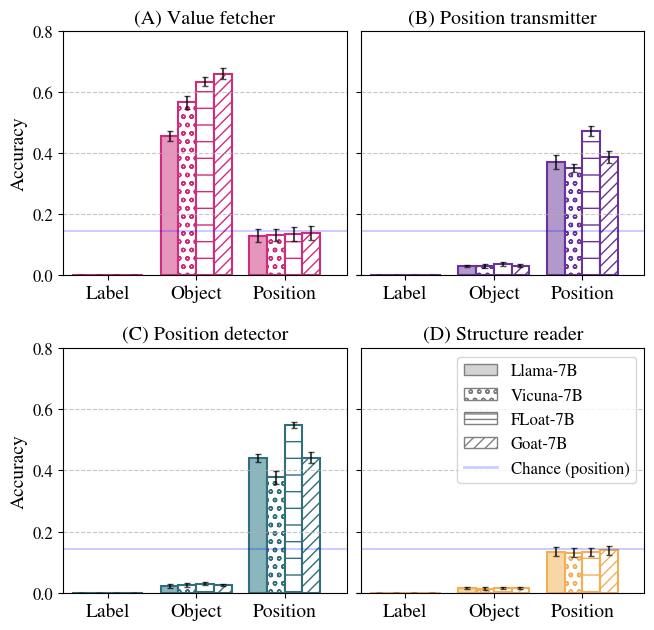

In [40]:
source = '../finetuning/experiment_2/results/activation_patching/llama_circuit/'
models = ['llama','vicuna','float','goat']
groups = ['value_fetcher','pos_transmitter','pos_detector','struct_reader']
tests = ['box_label_value','object_value','positional']
data = {}

for model in models:
    with open(os.path.join(source,f"{model}_semantic_results.json"), 'r') as file:
        cur_data = json.load(file)
        data_means = {}
        data_stds = {}
        for group in groups:
            means = []
            stds = []
            for test in tests:
                values = cur_data[model][group][test]
                means.append(sum(values)/len(values)/100)
                stds.append(statistics.stdev([x / 100 for x in values]))
            data_means[group] = means
            data_stds[group] = stds
    data[f"{model}_mean"] = data_means    
    data[f"{model}_std"] = data_stds
    
    # set width ofbar
barWidth = 0.2
num_figs = 4

desiderata = ['Label', 'Object', 'Position']
group_names = ['(A) Value fetcher', '(B) Position transmitter', '(C) Position detector', '(D) Structure reader']
fig, axs = plt.subplots(2,2,figsize=(7.5, 7.3),)
plt.subplots_adjust(hspace=0.3,wspace=0.05)

matplotlib.rcParams['font.size'] = 12  # Increase the base font size
matplotlib.rcParams['font.family'] = 'Nimbus Roman'

patterns = {'llama':   ' ', 
            'vicuna':  'oo', 
            'float':   '-',
            'goat':    '///'}


in_colors = ['#E695BD', 
          '#B298CB', 
          '#8BB6BD',
          '#F8D7A6']


edge_colors = ['#CF2C7A', 
          '#68349A', 
          '#306F7B',
          '#F3AF56']


cap = 2

for i,group in enumerate(groups):
    llama_val = data['llama_mean'][group]
    vicuna_val = data['vicuna_mean'][group]
    float_val = data['float_mean'][group]
    goat_val = data['goat_mean'][group]
    
    llama_err = data['llama_std'][group]
    vicuna_err = data['vicuna_std'][group]
    float_err = data['float_std'][group]
    goat_err = data['goat_std'][group]
        
    # Set position of bar on X axis
    br1 = np.arange(len(llama_val))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    # Make the plot
    bars = axs[i//2, i%2].bar(br1, llama_val, color =in_colors[i], edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Llama-7b')
    for bar in bars:
        bar.set_hatch(patterns['llama']) 
    axs[i//2, i%2].errorbar(br1, llama_val, yerr=llama_err, fmt=' ', color='black', alpha=0.7, capsize=cap)
    bars = axs[i//2, i%2].bar(br2, vicuna_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Vicuna-7b')
    for bar in bars:
        bar.set_hatch(patterns['vicuna']) 
    axs[i//2, i%2].errorbar(br2, vicuna_val, yerr=vicuna_err, fmt=' ', color='black', alpha=0.7, capsize=cap)
    bars = axs[i//2, i%2].bar(br3, float_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Float-7b')
    for bar in bars:
        bar.set_hatch(patterns['float']) 
    axs[i//2, i%2].errorbar(br3, float_val, yerr=float_err, fmt=' ', color='black', alpha=0.7, capsize=cap)
    bars = axs[i//2, i%2].bar(br4, goat_val, color ='w', edgecolor=edge_colors[i], linewidth=1.5, width = barWidth, label ='Goat-7b')
    for bar in bars:
        bar.set_hatch(patterns['goat'])
    axs[i//2, i%2].errorbar(br4, goat_val, yerr=goat_err, fmt=' ', color='black', alpha=0.7, capsize=cap)
    axs[i//2, i%2].plot([br1[0]-1,br4[-1]+1],[0.1428,0.1428], color ='blue', alpha = 0.2, label='Chance (position)')

    # Adding Xticks
    axs[i//2, i%2].set_xticks([r + 2*barWidth-barWidth/2 for r in br1])  # Set the tick positions
    axs[i//2, i%2].set_xticklabels(desiderata,fontsize=14)  # Set the tick labels
    axs[i//2, i%2].tick_params(axis="x", labelrotation=0) 
#     axs[i].grid(axis='y')
    axs[i//2, i%2].set_ylim(0,0.8)
    axs[i//2, i%2].set_yticks([0,0.2,0.4,0.6,0.8])
    axs[i//2, i%2].set_xlim(-.2,3)
    axs[i//2, i%2].set_title(group_names[i])


    if (i==0) or (i == 2):
        axs[i//2, i%2].set_ylabel('Accuracy', fontsize=14)
        axs[i//2, i%2].grid(True, axis='y', linestyle='--', alpha=0.7) 


    else:
        axs[i//2, i%2].set_ylim(0,0.8)
        axs[i//2, i%2].set_yticks([0,0.2,0.4,0.6,0,8])
        axs[i//2, i%2].grid(True, axis='y', linestyle='--', alpha=0.7)
    #         axs[i].set_yticks([    ])
#         tick_positions = axs[i//2, i%2].get_yticks()
#         tick_labels = axs[i//2, i%2].get_yticklabels()

        # Set the tick positions and empty labels
        axs[i//2, i%2].set_yticks([0,0.2,0.4,0.6,0,8])
        axs[i//2, i%2].set_yticklabels([''] * len([0,0.2,0.4,0.6,0,8]))  # Set empty labels
        axs[i//2, i%2].set_ylim(0,0.8)
    if i==3:
        custom_handles = [
        mpatches.Patch(facecolor='lightgrey', edgecolor='grey', label='Llama-7B'),
        mpatches.Patch(facecolor='w', hatch='oo', edgecolor='grey', label='Vicuna-7B'),
        mpatches.Patch(facecolor='w', hatch='---', edgecolor='grey', label='FLoat-7B'),
        mpatches.Patch(facecolor='w', hatch=patterns['goat'], edgecolor='grey', label='Goat-7B'),
        Line2D([0], [0], color ='blue', alpha = 0.2, lw=2, label='Chance (position)')
        ]

    # Create the legend with custom handles
        axs[i//2, i%2].legend(handles=custom_handles)
    

plt.savefig('dcm_llama_circuit.pdf')



### CMAP - goat

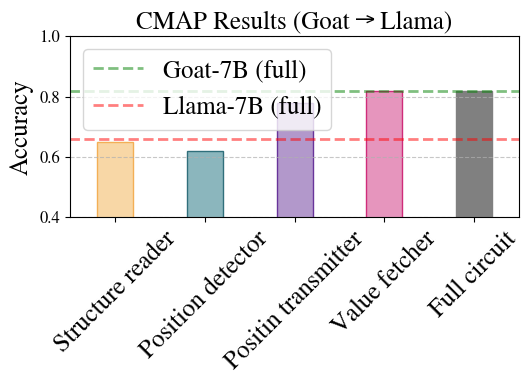

In [132]:
head_gropus = ['Structure reader','Position detector','Positin transmitter','Value fetcher', 'Full circuit']

cmap_heads = [0.65,0.62,0.78,0.82,0.82]
llama_full = 0.66
goat_full = 0.82
# inputs_pos = ['Final Query', 'Keys', 'Values','Keys, Final Query', 'Keys, Final Query,\nLable position val.', 'Keys, Final Query,\nAll values'] 
# cmap_pos = [0.6967, 0.6167, 0.7367, 0.7133, 0.7467, 0.7833]
# inputs_val = ['Final Query', 'Keys', 'Values','Keys, Final Query', 'Keys, Final Query,\nLable position val.', 'Keys, Final Query,\nAll values'] 
# cmap_val = [0.7517, 0.6667, 0.69, 0.7533, 0.76, 0.765]


titles = ['Circuit groups']
values = [cmap_heads]
barWidth = 0.4
num_figs = 1
labels = [head_gropus]
fig, axs = plt.subplots(1,num_figs,figsize=(5.5,4))
plt.subplots_adjust(hspace=0.05,wspace=0.05)

in_colors = ['#F8D7A6',
             '#8BB6BD',
             '#B298CB',
             '#E695BD',
          'grey']


edge_colors = ['#F3AF56',
               '#306F7B',
               '#68349A', 
               '#CF2C7A', 
          'grey']

# for i in range(num_figs):
val = values[0]
val
br1 = np.arange(len(val))
# Make the plot
axs.plot(range(-1,len(val)+1), llama_full*np.ones(len(val)+2), '--', color='red', alpha=.5, label='Llama-7B (full)', linewidth=2)
axs.plot(range(-1,len(val)+1), goat_full*np.ones(len(val)+2), '--', color='green', alpha=.5, label='Goat-7B (full)', linewidth=2)
axs.bar(br1, val, color =in_colors, edgecolor=edge_colors, width = barWidth)


# Adding Xticks
axs.set_xticks(br1)  # Set the tick positions
axs.set_xticklabels(head_gropus, fontsize = 18)  # Set the tick labels
axs.tick_params(axis="x", labelrotation=45, labelright=True, labelleft=False) 
# for label in axs.get_xticklabels():
#     label.set_horizontalalignment('right')
axs.set_xlim(-0.5,4.5)
axs.set_ylim(0.5,0.85)
axs.set_title('CMAP Results (Goat → Llama)', fontsize=18)


#     if i==0:
axs.set_ylim(0.4,1)
axs.set_ylabel('Accuracy', fontsize = 18)
axs.grid(True, axis='y', linestyle='--', alpha=0.7)
#     if i==3:    
#         axs[i].legend(fontsize = 12, ncol=2, frameon=False, loc='upper left')
axs.legend(fontsize = 18,handles=[axs.lines[1],axs.lines[0]], labels=['Goat-7B (full)','Llama-7B (full)'], loc='upper left')
#     else:
#         axs[i].set_ylim(0.5,0.85)
#         axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)
# #         tick_positions = axs[i].get_yticks()
#         tick_labels = axs[i].get_yticklabels()

#         # Set the tick positions and empty labels
# #         axs[i].set_yticks(tick_positions)
#         axs[i].set_yticklabels([''] * len(tick_labels))  # Set empty labels
plt.tight_layout()
plt.savefig('cmap_goat.pdf')


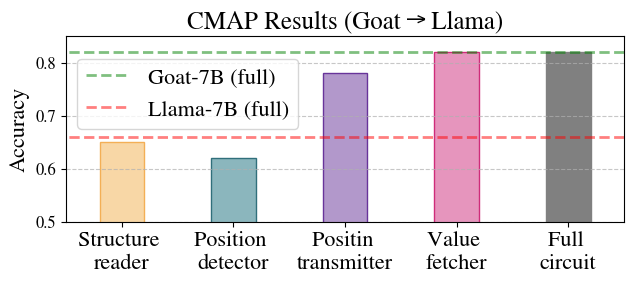

In [149]:
head_gropus = ['Structure \nreader','Position \ndetector','Positin \ntransmitter','Value \nfetcher', 'Full \ncircuit']
cmap_heads = [0.65,0.62,0.78,0.82,0.82]


titles = ['Circuit groups']
values = [cmap_heads]
barWidth = 0.4
num_figs = 1
labels = [head_gropus]
fig, axs = plt.subplots(1,num_figs,figsize=(6.5,3))
plt.subplots_adjust(hspace=0.05,wspace=0.05)

in_colors = ['#F8D7A6',
             '#8BB6BD',
             '#B298CB',
             '#E695BD',
          'grey']


edge_colors = ['#F3AF56',
               '#306F7B',
               '#68349A', 
               '#CF2C7A', 
          'grey']

# for i in range(num_figs):
val = values[0]
val
br1 = np.arange(len(val))
# Make the plot
axs.plot(range(-1,len(val)+1), llama_full*np.ones(len(val)+2), '--', color='red', alpha=.5, label='Llama-7B (full)', linewidth=2)
axs.plot(range(-1,len(val)+1), goat_full*np.ones(len(val)+2), '--', color='green', alpha=.5, label='Goat-7B (full)', linewidth=2)
axs.bar(br1, val, color =in_colors, edgecolor=edge_colors, width = barWidth)


# Adding Xticks
axs.set_xticks(br1)  # Set the tick positions
axs.set_xticklabels(head_gropus, fontsize = 16)  # Set the tick labels
axs.tick_params(axis="x", labelrotation=0, labelright=True, labelleft=False) 
# for label in axs.get_xticklabels():
#     label.set_horizontalalignment('right')
axs.set_xlim(-0.5,4.5)
axs.set_ylim(0.5,0.85)
# axs.set_title(titles[i])


#     if i==0:
axs.set_ylim(0.5,0.85)
axs.set_ylabel('Accuracy', fontsize = 16)
axs.grid(True, axis='y', linestyle='--', alpha=0.7)
#     if i==3:    
#         axs[i].legend(fontsize = 12, ncol=2, frameon=False, loc='upper left')
axs.legend(fontsize = 16,handles=[axs.lines[1],axs.lines[0]], labels=['Goat-7B (full)','Llama-7B (full)'], loc='upper left', bbox_to_anchor=(0, 0.94))
axs.set_title('CMAP Results (Goat → Llama)', fontsize=18)

#     else:
#         axs[i].set_ylim(0.5,0.85)
#         axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)
# #         tick_positions = axs[i].get_yticks()
#         tick_labels = axs[i].get_yticklabels()

#         # Set the tick positions and empty labels
# #         axs[i].set_yticks(tick_positions)
#         axs[i].set_yticklabels([''] * len(tick_labels))  # Set empty labels
plt.tight_layout()
plt.savefig('cmap_goat.pdf')

### CMAP - float

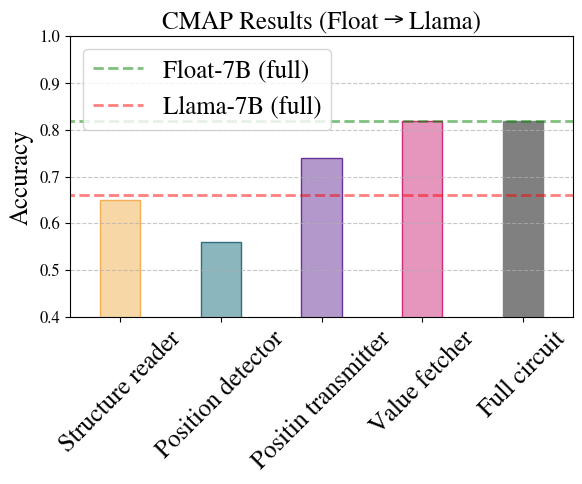

In [139]:
head_gropus = ['Structure reader','Position detector','Positin transmitter','Value fetcher', 'Full circuit']

cmap_heads = [0.65,0.56,0.74,0.82,0.82]
llama_full = 0.66
goat_full = 0.82
# inputs_pos = ['Final Query', 'Keys', 'Values','Keys, Final Query', 'Keys, Final Query,\nLable position val.', 'Keys, Final Query,\nAll values'] 
# cmap_pos = [0.6967, 0.6167, 0.7367, 0.7133, 0.7467, 0.7833]
# inputs_val = ['Final Query', 'Keys', 'Values','Keys, Final Query', 'Keys, Final Query,\nLable position val.', 'Keys, Final Query,\nAll values'] 
# cmap_val = [0.7517, 0.6667, 0.69, 0.7533, 0.76, 0.765]


titles = ['Circuit groups']
values = [cmap_heads]
barWidth = 0.4
num_figs = 1
labels = [head_gropus]
fig, axs = plt.subplots(1,num_figs,figsize=(6,5))
plt.subplots_adjust(hspace=0.05,wspace=0.05)

in_colors = ['#F8D7A6',
             '#8BB6BD',
             '#B298CB',
             '#E695BD',
          'grey']


edge_colors = ['#F3AF56',
               '#306F7B',
               '#68349A', 
               '#CF2C7A', 
          'grey']

# for i in range(num_figs):
val = values[0]
val
br1 = np.arange(len(val))
# Make the plot
axs.plot(range(-1,len(val)+1), llama_full*np.ones(len(val)+2), '--', color='red', alpha=.5, label='Llama-7B (full)', linewidth=2)
axs.plot(range(-1,len(val)+1), goat_full*np.ones(len(val)+2), '--', color='green', alpha=.5, label='Goat-7B (full)', linewidth=2)
axs.bar(br1, val, color =in_colors, edgecolor=edge_colors, width = barWidth)


# Adding Xticks
axs.set_xticks(br1)  # Set the tick positions
axs.set_xticklabels(head_gropus, fontsize = 18)  # Set the tick labels
axs.tick_params(axis="x", labelrotation=45, labelright=True, labelleft=False) 
# for label in axs.get_xticklabels():
#     label.set_horizontalalignment('right')
axs.set_xlim(-0.5,4.5)
axs.set_ylim(0.5,0.85)
axs.set_title('CMAP Results (Float → Llama)', fontsize=18)


#     if i==0:
axs.set_ylim(0.4,1)
axs.set_ylabel('Accuracy', fontsize = 18)
axs.grid(True, axis='y', linestyle='--', alpha=0.7)
#     if i==3:    
#         axs[i].legend(fontsize = 12, ncol=2, frameon=False, loc='upper left')
axs.legend(fontsize = 18,handles=[axs.lines[1],axs.lines[0]], labels=['Float-7B (full)','Llama-7B (full)'], loc='upper left')
#     else:
#         axs[i].set_ylim(0.5,0.85)
#         axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)
# #         tick_positions = axs[i].get_yticks()
#         tick_labels = axs[i].get_yticklabels()

#         # Set the tick positions and empty labels
# #         axs[i].set_yticks(tick_positions)
#         axs[i].set_yticklabels([''] * len(tick_labels))  # Set empty labels
plt.tight_layout()
plt.savefig('cmap_float.pdf')


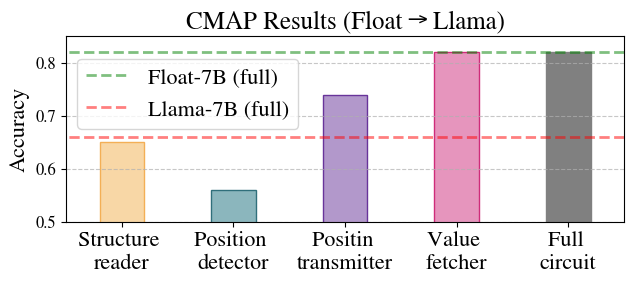

In [148]:
head_gropus = ['Structure \nreader','Position \ndetector','Positin \ntransmitter','Value \nfetcher', 'Full \ncircuit']

cmap_heads = [0.65,0.56,0.74,0.82,0.82]



titles = ['Circuit groups']
values = [cmap_heads]
barWidth = 0.4
num_figs = 1
labels = [head_gropus]
fig, axs = plt.subplots(1,num_figs,figsize=(6.5,3))
plt.subplots_adjust(hspace=0.05,wspace=0.05)

in_colors = ['#F8D7A6',
             '#8BB6BD',
             '#B298CB',
             '#E695BD',
          'grey']


edge_colors = ['#F3AF56',
               '#306F7B',
               '#68349A', 
               '#CF2C7A', 
          'grey']

# for i in range(num_figs):
val = values[0]
val
br1 = np.arange(len(val))
# Make the plot
axs.plot(range(-1,len(val)+1), llama_full*np.ones(len(val)+2), '--', color='red', alpha=.5, label='Llama-7B (full)', linewidth=2)
axs.plot(range(-1,len(val)+1), goat_full*np.ones(len(val)+2), '--', color='green', alpha=.5, label='Goat-7B (full)', linewidth=2)
axs.bar(br1, val, color =in_colors, edgecolor=edge_colors, width = barWidth)


# Adding Xticks
axs.set_xticks(br1)  # Set the tick positions
axs.set_xticklabels(head_gropus, fontsize = 16)  # Set the tick labels
axs.tick_params(axis="x", labelrotation=0, labelright=True, labelleft=False) 
# for label in axs.get_xticklabels():
#     label.set_horizontalalignment('right')
axs.set_xlim(-0.5,4.5)
axs.set_ylim(0.5,0.85)
# axs.set_title(titles[i])


#     if i==0:
axs.set_ylim(0.5,0.85)
axs.set_ylabel('Accuracy', fontsize = 16)
axs.grid(True, axis='y', linestyle='--', alpha=0.7)
#     if i==3:    
#         axs[i].legend(fontsize = 12, ncol=2, frameon=False, loc='upper left')
axs.legend(fontsize = 16,handles=[axs.lines[1],axs.lines[0]], labels=['Float-7B (full)','Llama-7B (full)'], loc='upper left', bbox_to_anchor=(0, 0.94))
axs.set_title('CMAP Results (Float → Llama)', fontsize=18)

#     else:
#         axs[i].set_ylim(0.5,0.85)
#         axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)
# #         tick_positions = axs[i].get_yticks()
#         tick_labels = axs[i].get_yticklabels()

#         # Set the tick positions and empty labels
# #         axs[i].set_yticks(tick_positions)
#         axs[i].set_yticklabels([''] * len(tick_labels))  # Set empty labels
plt.tight_layout()
plt.savefig('cmap_float.pdf')

['Structure reader',
 'Position detector',
 'Positin transmitter',
 'Value fetcher',
 'Full circuit']

['Structure reader',
 'Position detector',
 'Positin transmitter',
 'Value fetcher',
 'Full circuit']

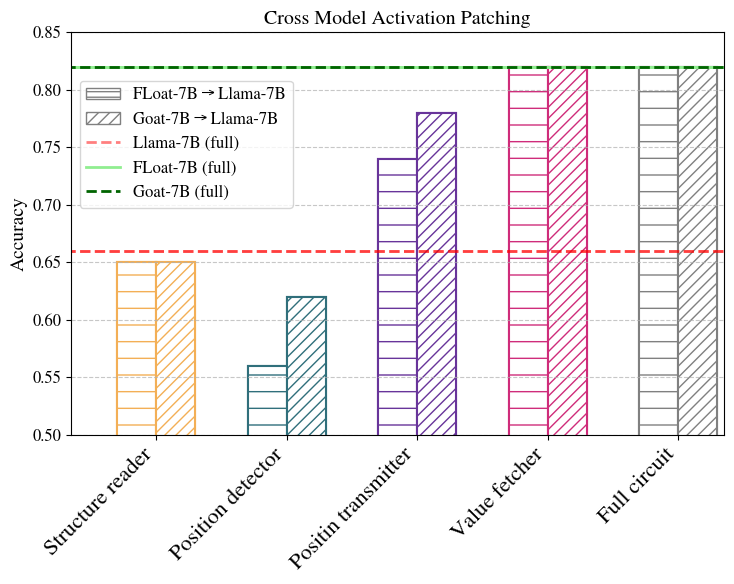

In [128]:
# source = '../finetuning/experiment_2/results/activation_patching/goat_circuit/'
models = ['float','goat']
groups = ['value_fetcher','pos_transmitter','pos_detector','struct_reader']
head_gropus = ['Structure reader','Position detector','Positin transmitter','Value fetcher', 'Full circuit']

goat = [0.65,0.62,0.78,0.82,0.82]
flt = [0.65,0.56,0.74,0.82,0.82]


# set width ofbar
barWidth = 0.3
num_figs = 1

fig, axs = plt.subplots(1,num_figs,figsize=(7.5, 6))
plt.subplots_adjust(hspace=0.05,wspace=0.05)

matplotlib.rcParams['font.size'] = 12  # Increase the base font size
matplotlib.rcParams['font.family'] = 'Nimbus Roman'

patterns = {
            'float':   '-',
            'goat':    '///'}



in_colors = ['#F8D7A6',
             '#8BB6BD',
             '#B298CB',
             '#E695BD',
          'grey']


edge_colors = ['#F3AF56',
               '#306F7B',
               '#68349A', 
               '#CF2C7A', 
          'grey']


for i,group in enumerate(models):
    float_val = flt
    goat_val = goat
    
    # Set position of bar on X axis
    br1 = np.arange(len(goat))
    br2 = [x + barWidth for x in br1]
    
    axs.plot(range(-1,len(val)+1), llama_full*np.ones(len(val)+2), '--', color='red', alpha=.5, label='Llama-7B (full)', linewidth=2)
    axs.plot(range(-1,len(val)+1), goat_full*np.ones(len(val)+2), '-', color='lightgreen', alpha=1, label='Float-7B (full)', linewidth=2)
    axs.plot(range(-1,len(val)+1), goat_full*np.ones(len(val)+2), '--', color='darkgreen', alpha=1, label='Goat-7B (full)', linewidth=2)
    axs.bar(br1, float_val, color =in_colors, edgecolor=edge_colors, width = barWidth)
    bars = axs.bar(br1, float_val, color ='w', edgecolor=edge_colors, linewidth=1.5, width = barWidth, label ='Float-7b')
    for bar in bars:
        bar.set_hatch(patterns['float'])     
    bars = axs.bar(br2, goat_val, color ='w', edgecolor=edge_colors, linewidth=1.5, width = barWidth, label ='Goat-7b')
    for bar in bars:
        bar.set_hatch(patterns['goat']) 
    axs.plot([br1[0]-1,br2[-1]+1],[0.1428,0.1428], color ='blue', alpha = 0.2, label='Chance (position)')

    # Adding Xticks
    display(head_gropus)
    axs.set_xticks(br1+barWidth/2)  # Set the tick positions
    axs.set_xticklabels(head_gropus, fontsize = 16)  # Set the tick labels
    axs.tick_params(axis="x", labelrotation=45, labelright=True, labelleft=False) 
    for label in axs.get_xticklabels():
        label.set_horizontalalignment('right')
        axs.grid(axis='y')
    axs.set_ylim(0,0.7)
    axs.set_xlim(-.2,3)
    axs.set_title('Cross Model Activation Patching')


    axs.set_ylabel('Accuracy', fontsize=16)
    axs.grid(True, axis='y', linestyle='--', alpha=0.7)  
    custom_handles = [
    mpatches.Patch(facecolor='w', hatch='---', edgecolor='grey', label='FLoat-7B → Llama-7B'),
    mpatches.Patch(facecolor='w', hatch=patterns['goat'], edgecolor='grey', label='Goat-7B → Llama-7B'),
    Line2D([0], [0], color='red', linestyle='--',alpha = .5, lw=2, label='Llama-7B (full)'),
    Line2D([0], [0], color='lightgreen', alpha = 1, lw=2, label='FLoat-7B (full)'),
    Line2D([0], [0], color='darkgreen', linestyle='--', alpha = 1, lw=2, label='Goat-7B (full)')
    ]
    
    
#     axs.legend(fontsize = 16,handles=[axs.lines[1],axs.lines[0]], labels=['Float-7B (full)','Llama-7B (full)'], loc='upper left', bbox_to_anchor=(0, 0.9))

    # Create the legend with custom handles
    axs.legend(handles=custom_handles, loc='upper left', bbox_to_anchor=(0, 0.9))
    
    
    axs.set_xlim(-0.5,4.5)
    axs.set_ylim(0.5,0.85)

plt.tight_layout()
plt.savefig('dcm_all.pdf')

